# Debugging and Profiling Workshop in VS Code

Welcome to the workshop! In this notebook, we'll explore techniques for debugging and profiling Python code using VS Code. You'll learn to use built-in tools such as `breakpoint()`, `%timeit`, `cProfile`, and `%prun`, as well as VS Code-specific features like conditional breakpoints and logpoints.

Make sure you're running this notebook in a VS Code dev container with Jupyter support, and that you have the Python and Jupyter extensions installed.


## Timeit

`timeit` is a quick tool for fast and simple checks

In [1]:
import timeit
# Compare two methods to calculate sum of squares
def sum_squares_loop(n):
    total = 0
    for i in range(n):
        total += i ** 2
    return total

def sum_squares_comp(n):
    return sum([i ** 2 for i in range(n)])

# Using %timeit to compare performance
print("Timing sum_squares_loop:")
%timeit sum_squares_loop(10000)

print("\nTiming sum_squares_comp:")
%timeit sum_squares_comp(10000)

# Experiment with different ranges or implementations to see how performance varies.



Timing sum_squares_loop:
520 μs ± 6.84 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)

Timing sum_squares_comp:
449 μs ± 6.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


### `timeit` parameters
Using `timeit` with different number of runs (`-r`) or loops (`-n`) enable us to get more accurate results

The `-r` flag specifies the number of runs, and the `-n` flag specifies the number of loops per run. Each `run` will execute the specified amount of loops

#### What do you think is the difference between runs and loops?

In [2]:
#Use timeit with different number of runs to get more accurate results
print("\nTiming sum_squares_loop:")
%timeit -r 10 sum_squares_loop(10000) 
#You can also use timeit with different number of loops to get more accurate results
print("\nTiming sum_squares_comp:")
%timeit -r 5 -n 2000 sum_squares_comp(10000)



Timing sum_squares_loop:
515 μs ± 2.74 μs per loop (mean ± std. dev. of 10 runs, 1,000 loops each)

Timing sum_squares_comp:
442 μs ± 1.5 μs per loop (mean ± std. dev. of 5 runs, 2,000 loops each)


#### R: Runs are the number of times the code is executed, and loops are the number of iterations per run.

`%timeit -r X -n Y`:

- In each run (repeat), the code is executed Y times.
- You then obtain a vector of X total times—one for each run.
- %timeit reports the best (minimum) total time divided by Y, which gives the best average time per loop.


### To be able to store results in variables one should use `timeit.timeit` and/or `timeit.repeat`

In [3]:
print("\nTiming sum_squares_comp:")
%timeit -r 40 -n 1000 sum_squares_loop(5000) 
#is the same as
runs=40
repeats=1000
times = timeit.repeat(stmt='sum_squares_comp(5000)', globals=globals(), number=runs, repeat=repeats)
best = min(times) / runs*1e6
print(f"{best:.2f} µs per loop")


Timing sum_squares_comp:
264 μs ± 6.71 μs per loop (mean ± std. dev. of 40 runs, 1,000 loops each)
218.28 µs per loop


## `cProfile`

A very common profiler in Python is `cProfile`. In this cell, we profile a function that generates and sorts a list of random numbers using `cProfile`. The output shows how many function calls were made, along with timing details for each call.


In [4]:
import random
import cProfile

def sort_numbers(n):
    # Generate a list of n random numbers
    data = [random.random() for _ in range(n)]
    # Sort the list
    data.sort()
    return data

print("Profiling sort_numbers with cProfile:")
cProfile.run('sort_numbers(100000)')

Profiling sort_numbers with cProfile:
         100562 function calls (100556 primitive calls) in 0.043 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 2488392195.py:4(sort_numbers)
        3    0.000    0.000    0.000    0.000 <frozen abc>:121(__subclasscheck__)
        5    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1390(_handle_fromlist)
        1    0.001    0.001    0.001    0.001 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 asyncio.py:210(call_at)
        2    0.000    0.000    0.000    0.000 asyncio.py:225(add_callback)
        5    0.000    0.000    0.000    0.000 attrsettr.py:43(__getattr__)
        5    0.000    0.000    0.000    0.000 attrsettr.py:66(_get_attr_opt)
        2    0.000    0.000    0.006    0.003 base_events.py:1922(_run_once)
        3    0.000    0.000    0.000    0.000 base_events.py:2017(get_debug)
        3  

## Detailed Profiling with `%prun`

As you can see `cProfile` by itself is not super useful.

Using `%prun` allows you to profile a function directly in the Jupyter Notebook. This cell profiles `sort_numbers` for a larger input size, providing detailed timing information ordered by internal time.

In [5]:
print("\nProfiling sort_numbers with %prun:")
%prun sort_numbers(10000000)

# Study the profiling output and note which functions take the most time.


Profiling sort_numbers with %prun:
 

         10001367 function calls (10001335 primitive calls) in 5.577 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    3.393    3.393    3.393    3.393 {method 'sort' of 'list' objects}
        1    0.869    0.869    4.863    4.863 2488392195.py:4(sort_numbers)
 10000000    0.695    0.000    0.695    0.000 {method 'random' of '_random.Random' objects}
      2/1    0.479    0.239    5.339    5.339 <string>:1(<module>)
      7/2    0.095    0.014    0.000    0.000 {method 'poll' of 'select.epoll' objects}
       22    0.012    0.001    0.021    0.001 socket.py:635(send)
        2    0.011    0.005    0.018    0.009 {method '__exit__' of 'sqlite3.Connection' objects}
        1    0.006    0.006    0.010    0.010 poll.py:80(poll)
      4/2    0.005    0.001    0.022    0.011 ioloop.py:742(_run_callback)
        2    0.003    0.002    0.005    0.003 {method 'recv' of '_socket.socket' objects}
        1    0.003    0.0

## Advanced Profiling with PyInstrument

In this cell, we use **PyInstrument** to profile the performance of our `sort_numbers` function on a large dataset. PyInstrument is a statistical profiler that samples your program’s execution and generates a clear, hierarchical report of where time is spent in your code.

- **Profiler Setup:**  
  - The profiler is imported from `pyinstrument` and started using `profiler.start()`.
- **Profiling Output:**  
  - After executing the function, the profiler is stopped and the profiling report is printed.

This cell is designed to help you understand performance bottlenecks in your code by visualizing a hierarchical call tree of function execution times.


In [6]:
from pyinstrument import Profiler

profiler = Profiler()
profiler.start()

def sort_numbers(n):
    # Generate a list of n random numbers
    data = [random.random() for _ in range(n)]
    # Sort the list
    data.sort()
    return data


sort_numbers(10000000)

profiler.stop()
profiler.print()

# Study the profiling output and note which functions take the most time.


  _     ._   __/__   _ _  _  _ _/_   Recorded: 07:21:43  Samples:  1552
 /_//_/// /_\ / //_// / //_'/ //     Duration: 5.352     CPU time: 5.346
/   _/                      v5.0.1

Profile at /tmp/ipykernel_3259/7464325.py:4

5.351 <module>  /tmp/ipykernel_3259/7464325.py:1
├─ 4.883 sort_numbers  /tmp/ipykernel_3259/7464325.py:6
│  ├─ 3.324 list.sort  <built-in>
│  ├─ 0.883 [self]  /tmp/ipykernel_3259/7464325.py
│  └─ 0.675 Random.random  <built-in>
└─ 0.468 [self]  /tmp/ipykernel_3259/7464325.py




### Small challenge

Sort is the slowest part of this, but this code is definitely not efficient, how to make it better?

In [7]:
from pyinstrument import Profiler

profiler = Profiler()
profiler.start()

def sort_numbers(n):
    # Generate a list of n random numbers
    data = [random.random() for _ in range(n)]
    # Sort the list
    data.sort()
    return data

def sort_numbers_np(n):
    import numpy as np
    # Generate a list of n random numbers
    data = np.random.rand(n)
    # Sort the list
    data.sort()
    return data

data1=sort_numbers    (10000000)
data2=sort_numbers_np (10000000)

profiler.stop()
profiler.print()
# Study the profiling output and note which functions take the most time.


  _     ._   __/__   _ _  _  _ _/_   Recorded: 07:26:14  Samples:  1743
 /_//_/// /_\ / //_// / //_'/ //     Duration: 5.485     CPU time: 7.131
/   _/                      v5.0.1

Profile at /tmp/ipykernel_3259/62176446.py:4

5.485 <module>  /tmp/ipykernel_3259/62176446.py:1
├─ 5.103 sort_numbers  /tmp/ipykernel_3259/62176446.py:6
│  ├─ 3.409 list.sort  <built-in>
│  ├─ 1.047 [self]  /tmp/ipykernel_3259/62176446.py
│  └─ 0.647 Random.random  <built-in>
└─ 0.382 sort_numbers_np  /tmp/ipykernel_3259/62176446.py:13
   ├─ 0.140 ndarray.sort  <built-in>
   └─ 0.136 <module>  numpy/__init__.py:1
         [3 frames hidden]  numpy




### A more complex example

In [8]:
import math
import random

def compute_statistics(data):
    """
    Compute basic statistics (mean and variance) for a list of numbers.
    This function iterates over the data twice:
      - Once to calculate the mean.
      - Once more to compute the variance.
    """
    n = len(data)
    mean_val = sum(data) / n
    variance = sum((x - mean_val) ** 2 for x in data) / n
    return mean_val, variance

def transform_data(n):
    """
    Generate a list of n random numbers and apply a transformation:
    each random number x is transformed by calculating math.sqrt(x) * math.sin(x).
    This function calls:
      - random.random() for each element.
      - math.sqrt() and math.sin() for the transformation.
    """
    # Generate n random numbers
    data = [random.random() for _ in range(n)]
    # Transform the data using math operations
    transformed = [math.sqrt(x) * math.sin(x) for x in data]
    return transformed

def process_data(n):
    """
    Process data by first transforming it and then computing its statistics.
    This function builds a dependency tree:
      process_data -> transform_data -> (random.random, math.sqrt, math.sin)
                      -> compute_statistics -> (sum, generator expressions)
    """
    transformed = transform_data(n)
    stats = compute_statistics(transformed)
    return stats

def main(n, iterations=5):
    """
    Run process_data several times, collecting statistics each time.
    This loop simulates repeated data processing.
    """
    results = []
    for i in range(iterations):
        stats = process_data(n)
        results.append(stats)
    return results


    
profiler = Profiler()
profiler.start()
main(1000000)
profiler.stop()
profiler.print()



  _     ._   __/__   _ _  _  _ _/_   Recorded: 07:29:54  Samples:  3135
 /_//_/// /_\ / //_// / //_'/ //     Duration: 3.269     CPU time: 3.259
/   _/                      v5.0.1

Profile at /tmp/ipykernel_3259/761987407.py:55

3.268 <module>  /tmp/ipykernel_3259/761987407.py:1
└─ 3.268 main  /tmp/ipykernel_3259/761987407.py:41
   ├─ 3.234 process_data  /tmp/ipykernel_3259/761987407.py:30
   │  ├─ 2.291 transform_data  /tmp/ipykernel_3259/761987407.py:16
   │  │  ├─ 1.163 [self]  /tmp/ipykernel_3259/761987407.py
   │  │  ├─ 0.462 sin  <built-in>
   │  │  ├─ 0.364 sqrt  <built-in>
   │  │  └─ 0.302 Random.random  <built-in>
   │  ├─ 0.909 compute_statistics  /tmp/ipykernel_3259/761987407.py:4
   │  │  ├─ 0.531 <genexpr>  /tmp/ipykernel_3259/761987407.py:13
   │  │  ├─ 0.343 [self]  /tmp/ipykernel_3259/761987407.py
   │  │  └─ 0.035 sum  <built-in>
   │  └─ 0.034 [self]  /tmp/ipykernel_3259/761987407.py
   └─ 0.034 [self]  /tmp/ipykernel_3259/761987407.py




### This is a function that calculates the sum of all prime numbers, it doesn't perform very well

In [9]:


def sum_primes_naive(n):
    """Compute the sum of all prime numbers below n using a naïve approach."""
    def is_prime(x):
        if x < 2:
            return False
        # Check divisibility from 2 up to sqrt(x)
        for i in range(2, int(x**0.5) + 1):
            if x % i == 0:
                return False
        return True

    total = 0
    for num in range(2, n):
        if is_prime(num):
            total += num
    return total

print("Naïve Sum of Primes below 10000:", sum_primes_naive(1000000))


Naïve Sum of Primes below 10000: 37550402023


### Here is a very basic way to test how a code scales:

In [10]:
import matplotlib.pyplot as plt


n_values = [100, 200, 400, 800,1600,3200]

times_naive = []
runs=20
repeats=1000
# Use timeit.timeit to measure performance. Using number=1 so that we run the function once per n.
for n in n_values:
    t=  timeit.repeat('sum_primes_naive(n)', globals=globals(), number=runs, repeat=repeats)
    t=min(t)/runs*1e3
    times_naive.append(t)
    print(f"n = {n:5d}, time = {t:.4f} ms")



n =   100, time = 0.0234 ms
n =   200, time = 0.0526 ms
n =   400, time = 0.1157 ms
n =   800, time = 0.2489 ms
n =  1600, time = 0.5573 ms
n =  3200, time = 1.2617 ms


[0.02343999999538937,
 0.05259239999304555,
 0.11567089998152369,
 0.24892065000585717,
 0.5572927499997604,
 1.2616731999969488]

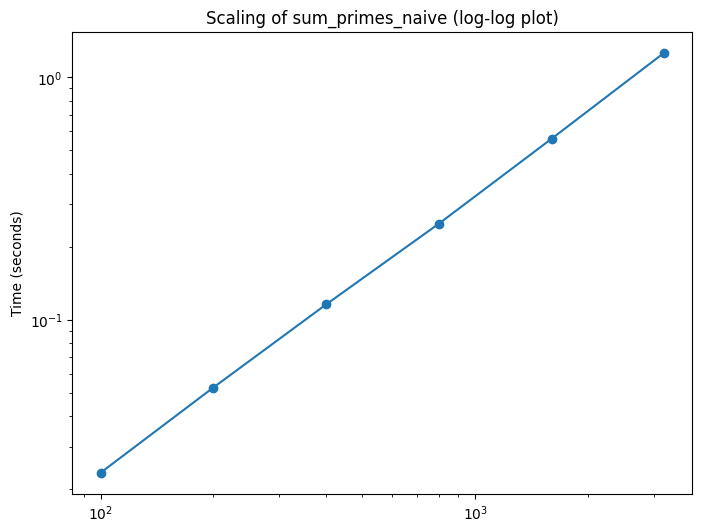

In [11]:
plt.figure(figsize=(8, 6))
plt.loglog(n_values, times_naive, 'o-', label='Measured time')
plt.ylabel("Time (seconds)")
plt.title("Scaling of sum_primes_naive (log-log plot)")
times_naive

### Can you propose a new function that performs better? Compare with the previous version

In [12]:
def sum_primes_stored(n):
    """Compute the sum of all prime numbers below n using stored primes for divisibility tests."""
    if n < 2:
        return 0

    primes = []
    total = 0
    # Iterate over every candidate number
    for candidate in range(2, n):
        is_prime = True
        # Only check divisibility by primes up to sqrt(candidate)
        for p in primes:
            if p * p > candidate:
                break
            if candidate % p == 0:
                is_prime = False
                break
        if is_prime:
            primes.append(candidate)
            total += candidate
    return total


times = []
runs=20
repeats=1000
# Use timeit.timeit to measure performance. Using number=1 so that we run the function once per n.
for n in n_values:
    t=  timeit.repeat('sum_primes_stored(n)', globals=globals(), number=runs, repeat=repeats)
    t=min(t)/runs*1e3
    times.append(t)
    print(f"n = {n:5d}, time = {t:.4f} ms")



n =   100, time = 0.0097 ms
n =   200, time = 0.0215 ms
n =   400, time = 0.0479 ms
n =   800, time = 0.1096 ms
n =  1600, time = 0.2433 ms
n =  3200, time = 0.5219 ms


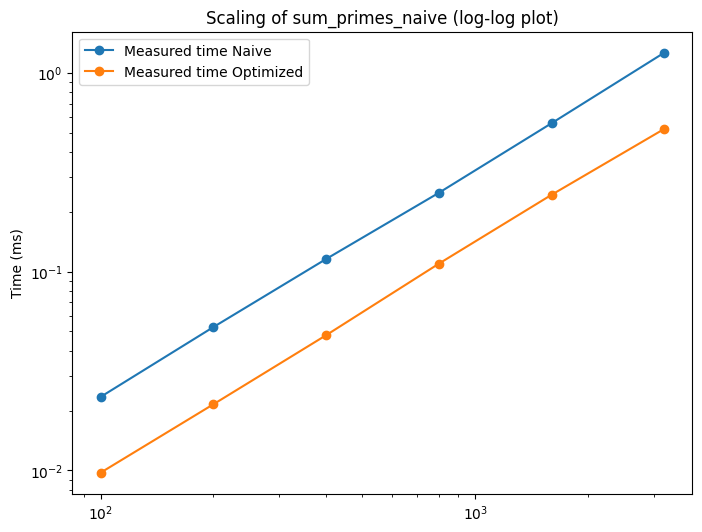

In [13]:
plt.figure(figsize=(8, 6))
plt.loglog(n_values, times_naive, 'o-', label='Measured time Naive')
plt.loglog(n_values, times, 'o-', label='Measured time Optimized')
plt.ylabel("Time (ms)")
plt.title("Scaling of sum_primes_naive (log-log plot)")
plt.legend()

## Debugging with `pdb` and `breakpoint()`

In this cell, we demonstrate how to use Python’s built-in debugger (`pdb`) via the `breakpoint()` function. Run this cell using the notebook-specific debug command (Ctrl+Shift+Alt+Enter) so that execution will pause at the breakpoint, letting you inspect variables and step through the code.


In [17]:
# Simple debugging example using pdb and breakpoint
def buggy_function(x):
    result = x * 2
    # Introduce a deliberate error: division by zero when x is 0
    if x == 0:
        breakpoint()  # This starts the interactive debugger
        print('Entering debugger because x is 0')
        result = result / x  
    return result

# Trigger the debugger by passing 0
bla=0
buggy_function(bla)



Entering debugger because x is 0


ZeroDivisionError: division by zero

In [20]:
# Debugging a recursive Fibonacci function
# The Fibonacci sequence is a series of numbers in which each number is the sum of the two preceding ones.
# It starts with 0 and 1, and the sequence goes 0, 1, 1, 2, 3, 5, 8, 13, 21, and so on.
# The Fibonacci function is often used as an example of recursion.
# This implementation has a bug that causes it to return incorrect results for n > 1.
# Use the interactive debugger to step through the recursion and find the bug and how many iterations are done

def fib(n):
    if n < 0:
        raise ValueError('Negative arguments not allowed')
    if n in (0, 1):

        return n
    return fib(n - 1) + fib(n - 2)  

# Set breakpoints here in VS Code and call fib(5) to step through the recursion
print('Fibonacci result:', fib(15))

# Use the interactive debugger to examine how the recursion unfolds.

Fibonacci result: 610


## Using Conditional Breakpoints

Conditional breakpoints pause execution only when a specific condition is met. For example, in the cell below, right-click the red breakpoint (set on the `print` statement) and add the condition `i == 2` so that the debugger stops only when `i` equals 2.


In [19]:
def conditional_breakpoint_demo(n):
    total = 0
    for i in range(n):
        total += i
        # Set a mouse breakpoint on the following line and add the condition: i == 50
        print(f"Iteration {i}: total = {total}")
    return total

# Run the function
result = conditional_breakpoint_demo(100)
print("Final result:", result)


Iteration 0: total = 0
Iteration 1: total = 1
Iteration 2: total = 3
Iteration 3: total = 6
Iteration 4: total = 10
Iteration 5: total = 15
Iteration 6: total = 21
Iteration 7: total = 28
Iteration 8: total = 36
Iteration 9: total = 45
Iteration 10: total = 55
Iteration 11: total = 66
Iteration 12: total = 78
Iteration 13: total = 91
Iteration 14: total = 105
Iteration 15: total = 120
Iteration 16: total = 136
Iteration 17: total = 153
Iteration 18: total = 171
Iteration 19: total = 190
Iteration 20: total = 210
Iteration 21: total = 231
Iteration 22: total = 253
Iteration 23: total = 276
Iteration 24: total = 300
Iteration 25: total = 325
Iteration 26: total = 351
Iteration 27: total = 378
Iteration 28: total = 406
Iteration 29: total = 435
Iteration 30: total = 465
Iteration 31: total = 496
Iteration 32: total = 528
Iteration 33: total = 561
Iteration 34: total = 595
Iteration 35: total = 630
Iteration 36: total = 666
Iteration 37: total = 703
Iteration 38: total = 741
Iteration 39: 